In [1]:
import numpy as np
import pandas as pd

In [2]:
!ls

 00-Keras-Syntax-Basics.ipynb		     final_project_model.h5
 01-Keras-Regression.ipynb		     full_data_project_model.h5
 02-Keras-Classification.ipynb		    'Full workflow data analysis.ipynb'
 03-Keras-Project-Exercise.ipynb	     my_gem_model.h5
 04-Keras-Project-Exercise-Solutions.ipynb  'My keras basic.ipynb'
 05-Tensorboard.ipynb			     my_model.h5
 california_housing_sklearn.csv		     project_model.h5


In [3]:
df = pd.read_csv("../DATA/fake_reg.csv")

In [4]:
df

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531
...,...,...,...
995,476.526078,1000.018988,999.672732
996,457.313186,998.855379,1000.020026
997,456.720992,1001.451646,998.847606
998,403.315576,1000.771023,998.562851


In [5]:
import seaborn as sns
%matplotlib inline

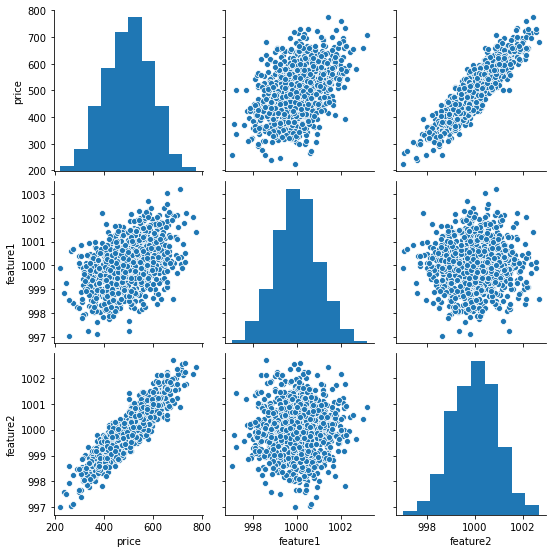

In [6]:
sns.pairplot(df)

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X = df[['feature1','feature2']].values#note that tensorflow needs data in numpy array format to work and not pandas.

In [8]:
X

array([[ 999.78755752,  999.7660962 ],
       [ 998.86161491, 1001.04240315],
       [1000.07026691,  998.84401463],
       ...,
       [1001.45164617,  998.84760554],
       [1000.77102275,  998.56285086],
       [ 999.2322436 , 1001.45140713]])

In [9]:
y = df['price'].values

In [10]:
y

array([461.52792939, 548.13001146, 410.29716167, 540.38221981,
       546.02455292, 542.9836716 , 555.48566416, 417.56972453,
       373.14653122, 633.35029248, 624.24709206, 475.37241721,
       600.36844486, 532.83295175, 472.8353628 , 506.31229096,
       508.414406  , 610.4553519 , 323.65776198, 446.21230389,
       362.12270299, 433.41064026, 562.00257647, 637.30962074,
       522.80800754, 469.8028243 , 543.10992778, 565.43416994,
       530.03285381, 610.58016503, 482.55641188, 327.56004052,
       579.73083872, 448.42981468, 628.97709187, 536.79737216,
       570.06729543, 357.82557519, 612.08492732, 444.67970846,
       600.1186364 , 523.53312776, 512.94994495, 614.8813169 ,
       404.35303251, 643.68851807, 488.95660398, 443.20468572,
       514.47906638, 514.88174058, 325.05852217, 554.6620585 ,
       451.39140001, 587.67887726, 477.73749721, 574.51560687,
       548.9107991 , 528.69088356, 443.21100482, 397.88209319,
       355.79535223, 460.69478138, 534.7673737 , 537.60

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
X_train.shape

(700, 2)

In [13]:
X_test.shape

(300, 2)

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
scaler = MinMaxScaler()

In [16]:
scaler.fit(X_train)# we dont fit X_test into it as we dont wnt to scale our training data based on X_test and to 
                   # avoid trainig on data influencedby test data.

MinMaxScaler()

In [17]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
X_train.max()

1.0

In [19]:
X_test.min()

-0.014108392024496652

In [20]:
from tensorflow.keras.models import Sequential # used to build neural network

In [21]:
from tensorflow.keras.layers import Dense , Activation # we use dense to add layers to the neural network.

In [23]:
help(Sequential)

Help on class Sequential in module tensorflow.python.keras.engine.sequential:

class Sequential(tensorflow.python.keras.engine.training.Model)
 |  Sequential(*args, **kwargs)
 |  
 |  `Sequential` groups a linear stack of layers into a `tf.keras.Model`.
 |  
 |  `Sequential` provides training and inference features on this model.
 |  
 |  Examples:
 |  
 |  >>> # Optionally, the first layer can receive an `input_shape` argument:
 |  >>> model = tf.keras.Sequential()
 |  >>> model.add(tf.keras.layers.Dense(8, input_shape=(16,)))
 |  >>> # Afterwards, we do automatic shape inference:
 |  >>> model.add(tf.keras.layers.Dense(4))
 |  
 |  >>> # This is identical to the following:
 |  >>> model = tf.keras.Sequential()
 |  >>> model.add(tf.keras.layers.Dense(8, input_dim=16))
 |  
 |  >>> # And to the following:
 |  >>> model = tf.keras.Sequential()
 |  >>> model.add(tf.keras.layers.Dense(8, batch_input_shape=(None, 16)))
 |  
 |  >>> # Note that you can also omit the `input_shape` argument.


In [24]:
help(Dense)

Help on class Dense in module tensorflow.python.keras.layers.core:

class Dense(tensorflow.python.keras.engine.base_layer.Layer)
 |  Dense(*args, **kwargs)
 |  
 |  Just your regular densely-connected NN layer.
 |  
 |  `Dense` implements the operation:
 |  `output = activation(dot(input, kernel) + bias)`
 |  where `activation` is the element-wise activation function
 |  passed as the `activation` argument, `kernel` is a weights matrix
 |  created by the layer, and `bias` is a bias vector created by the layer
 |  (only applicable if `use_bias` is `True`).
 |  
 |  Note: If the input to the layer has a rank greater than 2, then `Dense`
 |  computes the dot product between the `inputs` and the `kernel` along the
 |  last axis of the `inputs` and axis 1 of the `kernel` (using `tf.tensordot`).
 |  For example, if input has dimensions `(batch_size, d0, d1)`,
 |  then we create a `kernel` with shape `(d1, units)`, and the `kernel` operates
 |  along axis 2 of the `input`, on every sub-tensor

In [22]:
model = Sequential() # This created a neural Network Having just one layer for inputs.

model.add(Dense(4,activation="relu"))# Now we added a layer in the our neural network model having 4 neurons.
model.add(Dense(4,activation="relu"))# now we added Another
model.add(Dense(4,activation="relu"))# And one more
model.add(Dense(1))                  # And we added last layer for the output. Remember we are looking for the 
                                     # price of the object based on features.

model.compile(optimizer='rmsprop',loss="mse")
 # compilation step

In [23]:
model.fit(X_train,y_train,epochs=200)

Epoch 1/200
22/22 [==============================] - 0s 4ms/step - loss: 256519.8438
Epoch 2/200
22/22 [==============================] - 0s 4ms/step - loss: 256342.2812
Epoch 3/200
22/22 [==============================] - 0s 3ms/step - loss: 256149.2500
Epoch 4/200
22/22 [==============================] - 0s 4ms/step - loss: 255927.3125
Epoch 5/200
22/22 [==============================] - 0s 3ms/step - loss: 255673.0781
Epoch 6/200
22/22 [==============================] - 0s 3ms/step - loss: 255381.9219
Epoch 7/200
22/22 [==============================] - 0s 4ms/step - loss: 255056.7344
Epoch 8/200
22/22 [==============================] - 0s 4ms/step - loss: 254692.2031
Epoch 9/200
22/22 [==============================] - 0s 4ms/step - loss: 254285.0312
Epoch 10/200
22/22 [==============================] - 0s 3ms/step - loss: 253835.5938
Epoch 11/200
22/22 [==============================] - 0s 4ms/step - loss: 253336.0469
Epoch 12/200
22/22 [==============================] - 0s 3ms/st

22/22 [==============================] - 0s 3ms/step - loss: 1530.9634
Epoch 98/200
22/22 [==============================] - 0s 4ms/step - loss: 1496.9432
Epoch 99/200
22/22 [==============================] - 0s 3ms/step - loss: 1461.1771
Epoch 100/200
22/22 [==============================] - 0s 3ms/step - loss: 1427.4963
Epoch 101/200
22/22 [==============================] - 0s 2ms/step - loss: 1392.6731
Epoch 102/200
22/22 [==============================] - 0s 3ms/step - loss: 1358.3130
Epoch 103/200
22/22 [==============================] - 0s 3ms/step - loss: 1325.9116
Epoch 104/200
22/22 [==============================] - 0s 3ms/step - loss: 1290.1498
Epoch 105/200
22/22 [==============================] - 0s 3ms/step - loss: 1254.0800
Epoch 106/200
22/22 [==============================] - 0s 3ms/step - loss: 1221.6071
Epoch 107/200
22/22 [==============================] - 0s 3ms/step - loss: 1185.7371
Epoch 108/200
22/22 [==============================] - 0s 3ms/step - loss: 1152.2

Epoch 195/200
22/22 [==============================] - 0s 4ms/step - loss: 24.5590
Epoch 196/200
22/22 [==============================] - 0s 4ms/step - loss: 24.4034
Epoch 197/200
22/22 [==============================] - 0s 3ms/step - loss: 24.4696
Epoch 198/200
22/22 [==============================] - 0s 3ms/step - loss: 24.8228
Epoch 199/200
22/22 [==============================] - 0s 4ms/step - loss: 24.1100
Epoch 200/200
22/22 [==============================] - 0s 4ms/step - loss: 24.4521


In [24]:
loss_df = pd.DataFrame(model.history.history)

In [25]:
loss_df

,loss
0,256519.843750
1,256342.281250
2,256149.250000
3,255927.312500
4,255673.078125
...,...
195,24.403399
196,24.469584
197,24.822777
198,24.110044


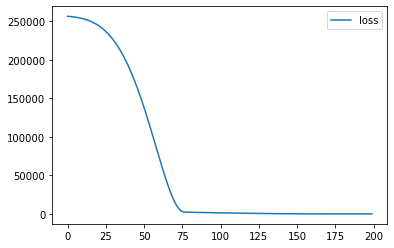

In [26]:
loss_df.plot()

In [29]:
import cufflinks as cf
cf.go_offline()

In [30]:
loss_df.iplot()

In [31]:
model.evaluate(X_test,y_test,verbose=0)

25.688663482666016

In [32]:
model.evaluate(X_train,y_train,verbose=0)

23.914724349975586

In [33]:
np.array(model.history.history)

array({}, dtype=object)

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
lm = LinearRegression()

In [36]:
lm.fit(X_train,y_train)

LinearRegression()

In [37]:
lm_pred = lm.predict(X_test)

In [38]:
lm_pred

array([405.50647789, 623.98699425, 592.54889969, 572.61273077,
       366.77977007, 579.57797005, 515.37309431, 459.38633512,
       549.6076754 , 447.78728618, 612.22113836, 549.32696616,
       419.33036261, 409.08742385, 651.73189195, 437.55357206,
       508.7887075 , 660.40677973, 663.06769801, 565.92881231,
       334.36288278, 445.09176538, 382.71446404, 378.94441984,
       566.9817166 , 611.01952866, 532.74020061, 428.10225963,
       655.91816056, 414.3127331 , 442.89754391, 485.42937963,
       438.66732816, 682.35191009, 425.0037238 , 417.91093638,
       502.26016072, 550.846957  , 510.05114167, 395.55161806,
       619.03657165, 416.86110231, 604.87934991, 446.22902318,
       502.30817802, 582.13331254, 669.50719161, 490.71486545,
       318.71014261, 485.72791165, 517.60205879, 381.98997813,
       542.27994526, 408.81598062, 641.9903892 , 491.38284141,
       628.38760677, 627.46336088, 447.3335503 , 484.99980004,
       491.44087593, 474.8347005 , 683.3021581 , 403.50

In [39]:
y_test

array([402.29631873, 624.15619847, 582.4550663 , 578.58860646,
       371.22410361, 584.38110772, 514.40564086, 464.11587006,
       551.65009963, 451.8041724 , 613.95995262, 547.73198239,
       428.31614877, 413.84178036, 654.83912076, 429.21452014,
       512.04904895, 657.71868008, 674.31102047, 565.19184559,
       338.0902386 , 450.9760715 , 375.13754715, 379.10982057,
       562.05793604, 593.6677957 , 531.27754687, 423.65453319,
       656.65474461, 412.90687671, 439.49653517, 488.78691774,
       448.51914416, 685.21654079, 424.81078609, 418.45717839,
       507.44318662, 550.14246248, 503.21614081, 397.88209319,
       621.11885596, 411.57560703, 609.3840753 , 449.02606966,
       503.51419982, 578.32901814, 664.50877632, 498.6284209 ,
       316.9505926 , 478.35823792, 514.89474416, 374.19760282,
       531.66193891, 405.40016562, 637.30962074, 482.55641188,
       624.99250404, 624.24709206, 455.13953399, 484.46159148,
       492.93591939, 477.73749721, 689.1734889 , 397.62

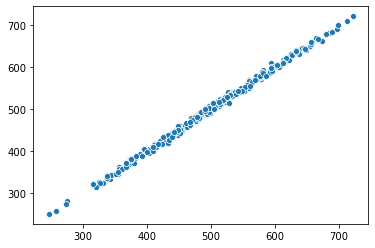

In [40]:
sns.scatterplot(y_test,lm_pred)

In [41]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [42]:
mean_absolute_error(y_test,lm_pred)

4.0221177264713655

In [43]:
mean_squared_error(y_test,lm_pred)

25.13916592930169